# Questão 1

# Um plataforma de comunicação registra eventos de execuções de chatbots. Escreva um serviço que computa quantos clientes executaram entre 1000 e 2000 chatbots.

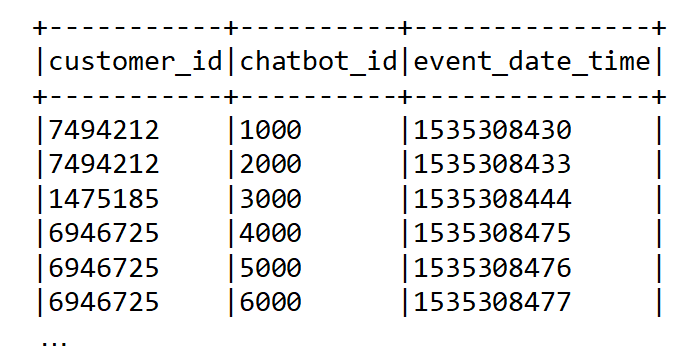


# Import Bibliotecas

In [29]:
import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession
from pyspark.context import SparkContext
import datetime 
from pyspark.sql.types import * 
from pyspark.sql.functions import * 

# Criando um Sessão no Spark

In [30]:
spark = SparkSession \
    .builder \
    .appName("Desafio STITDATA QUESTÃO 1") \
    .getOrCreate()

# Criando um variavel que recebe o path recerente ao arquivo que será carregado no datafrane

In [31]:
path_usados = './chatbot_usados.csv'

# Carregando arquivo CSV em um dataframe

In [32]:
dfChatUsados = spark.read.option("header", True)\
                        .option("inferSchema", True)\
                        .option("delimiter", "|")\
                        .csv(path_usados)

# Imprimindo o schema do dataframe

In [33]:
dfChatUsados.printSchema()

root
 |-- customer_id: integer (nullable = true)
 |-- chatbot_id: integer (nullable = true)
 |-- event_date_time: integer (nullable = true)



# Visualizando os dados no Dataframe

In [34]:
dfChatUsados.show()

+-----------+----------+---------------+
|customer_id|chatbot_id|event_date_time|
+-----------+----------+---------------+
|    7494212|      1000|     1535308430|
|    7494212|      2000|     1535308433|
|    1475185|      3000|     1535308444|
|    6946725|      4000|     1535308475|
|    6946725|      5000|     1535308476|
|    6946725|      6000|     1535308477|
+-----------+----------+---------------+



# Criando um novo dataframe que itá receber a quantidade de clientes que executaram os BOt entre 1000 a 2000

In [35]:
dfChatUsadosTotal = dfChatUsados.filter(col('chatbot_id').between(1000, 2000)).count()

# Imprimindo o Resultado

In [36]:
print("A quantidade total de cliente que executaram bot's entre 1000 e 2000 é: {}".format(dfChatUsadosTotal))

A quantidade total de cliente que executaram bot's entre 1000 e 2000 é: 2


# Questão 2

# Suponha que você está explorando dados de cobrança de chatbots de Jan/2020 e tem em mãos dois conjuntos de dados pré-processados. O primeiro armazena os clientes e respectivos chatbots utilizados naquele mês.

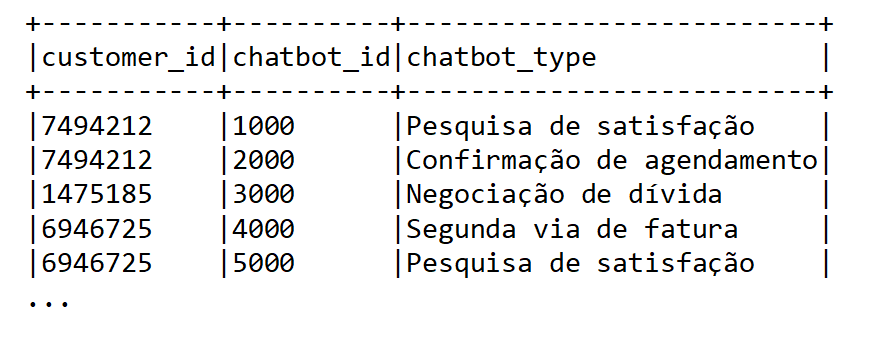

# O segundo mantém os valores de cobrança dos chatbots: 

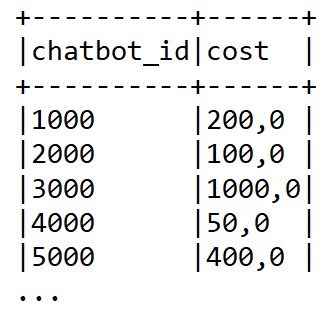

# Escreva um serviço que imprime os clientes os quais a média do custo é maior que R$ 500,00.	


# Criando as variaveis que recebem os path referentes aos arquivos que seram carregado no datafrane

In [37]:
path_cliente = './chatbot_users.csv'

path_custos = './chatbot_custos.csv'

# Carregando arquivo CSV em um dataframe dos clientes

In [50]:
dfCliente = spark.read.option("header", True)\
                        .option("inferSchema", True)\
                        .option("delimiter", "|")\
                        .csv(path_cliente)

# Imprimindo o schema do dataframe

In [39]:
dfCliente.printSchema()

root
 |-- customer_id: integer (nullable = true)
 |-- chatbot_id: integer (nullable = true)
 |-- chatbot_type: string (nullable = true)



# Visualizando os dados no Dataframe

In [40]:
dfCliente.show()

+-----------+----------+--------------------+
|customer_id|chatbot_id|        chatbot_type|
+-----------+----------+--------------------+
|    7494212|      1000|Pesquisa de satis...|
|    7494212|      2000|Confirmação de ag...|
|    1475185|      3000|Negociação de dívida|
|    6946725|      4000|Segunda via de fa...|
|    6946725|      5000|Pesquisa de satis...|
+-----------+----------+--------------------+



# Carregando arquivo CSV em um dataframe dos custos

In [52]:
dfCustos = spark.read.option("header", True)\
                        .option("inferSchema", True)\
                        .option("delimiter", "|")\
                        .csv(path_custos)\
                        .withColumn("cost", regexp_replace("cost", "\\,", ".").cast("Double").alias('cost'))\

# Imprimindo o schema do dataframe

In [42]:
dfCustos.printSchema()

root
 |-- chatbot_id: integer (nullable = true)
 |-- cost: double (nullable = true)



# Visualizando os dados no Dataframe

In [43]:
dfCustos.show()

+----------+------+
|chatbot_id|  cost|
+----------+------+
|      1000| 200.0|
|      2000| 100.0|
|      3000|1000.0|
|      4000|  50.0|
|      5000| 400.0|
+----------+------+



# Criando o join entre os dataframes de cliente e custos

In [48]:
dfClienteCusto = dfCliente.join(dfCustos, on=['chatbot_id']).select("customer_id", dfCliente.chatbot_id, "chatbot_type", "cost")

# Visualizando os dados no Dataframe

In [49]:
dfClienteCusto.show()

+-----------+----------+--------------------+------+
|customer_id|chatbot_id|        chatbot_type|  cost|
+-----------+----------+--------------------+------+
|    7494212|      1000|Pesquisa de satis...| 200.0|
|    7494212|      2000|Confirmação de ag...| 100.0|
|    1475185|      3000|Negociação de dívida|1000.0|
|    6946725|      4000|Segunda via de fa...|  50.0|
|    6946725|      5000|Pesquisa de satis...| 400.0|
+-----------+----------+--------------------+------+



# Realizando a consulta referente aos clientes, os quais a média do custo é maior que R$ 500,00 e armazenado em uma variavel como uma linha.

In [46]:
dfMaiorConsumo = dfClienteCusto.select("customer_id","chatbot_type", "cost").filter(col('cost') >= 500).collect()

# Imprimindo o resultado

In [47]:
print(f'Cliente(s) com a media maior que R$: 500.00!\n')

print(f'Cliente: {dfMaiorConsumo[0][0]} - tipo do chatbot: {dfMaiorConsumo[0][1]} - Valor Total (R$): {dfMaiorConsumo[0][2]}')

Cliente(s) com a media maior que R$: 500.00!

Cliente: 1475185 - tipo do chatbot: Negociação de dívida - Valor Total (R$): 1000.0
